In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash import Dash, dcc, html, Input, Output, State

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
titanic_df = pd.read_csv('./Resources/Titanic CSV.csv')  # Update the path to the correct location


In [3]:
# Display the first few rows of the DataFrame
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Find the number of missing values in each column
missing_values = titanic_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Drop the 'Cabin' column due to excessive missing values
titanic_df.drop(columns=['Cabin'], inplace=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
# Fill missing values in 'Age' with the median age
titanic_df.loc[:, 'Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
# Fill missing values in 'Embarked' with the mode (most common value)
fill_value = titanic_df['Embarked'].mode()[0]
titanic_df.loc[:, 'Embarked'] = titanic_df['Embarked'].fillna(fill_value)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
# Convert the 'Embarked' column to a categorical data type
titanic_df['Embarked'] = titanic_df['Embarked'].astype('category')

# Change the values in Embarked to "Southampton", "Cherbourg", and "Queenstown"
titanic_df['Embarked'] = titanic_df['Embarked'].cat.rename_categories({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


In [9]:
# Rearrange the columns to put 'Pclass' and 'Survived' at the end
columns_order = ['Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Pclass', 'Survived']
titanic_df = titanic_df[columns_order]
titanic_df.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass,Survived
0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg,1,1
2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton,1,1
4,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton,3,0


In [10]:
# Convert the data in Surivived from 0 to Died and 1 to Survived
titanic_df['Survived'] = titanic_df['Survived'].replace({0: 'Died', 1: 'Survived'})
titanic_df.head()

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass,Survived
0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton,3,Died
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg,1,Survived
2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,3,Survived
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton,1,Survived
4,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton,3,Died


In [13]:
# save the cleaned DataFrame to a new CSV file
titanic_df.to_csv('Titanic_Cleaned.csv', index=False)


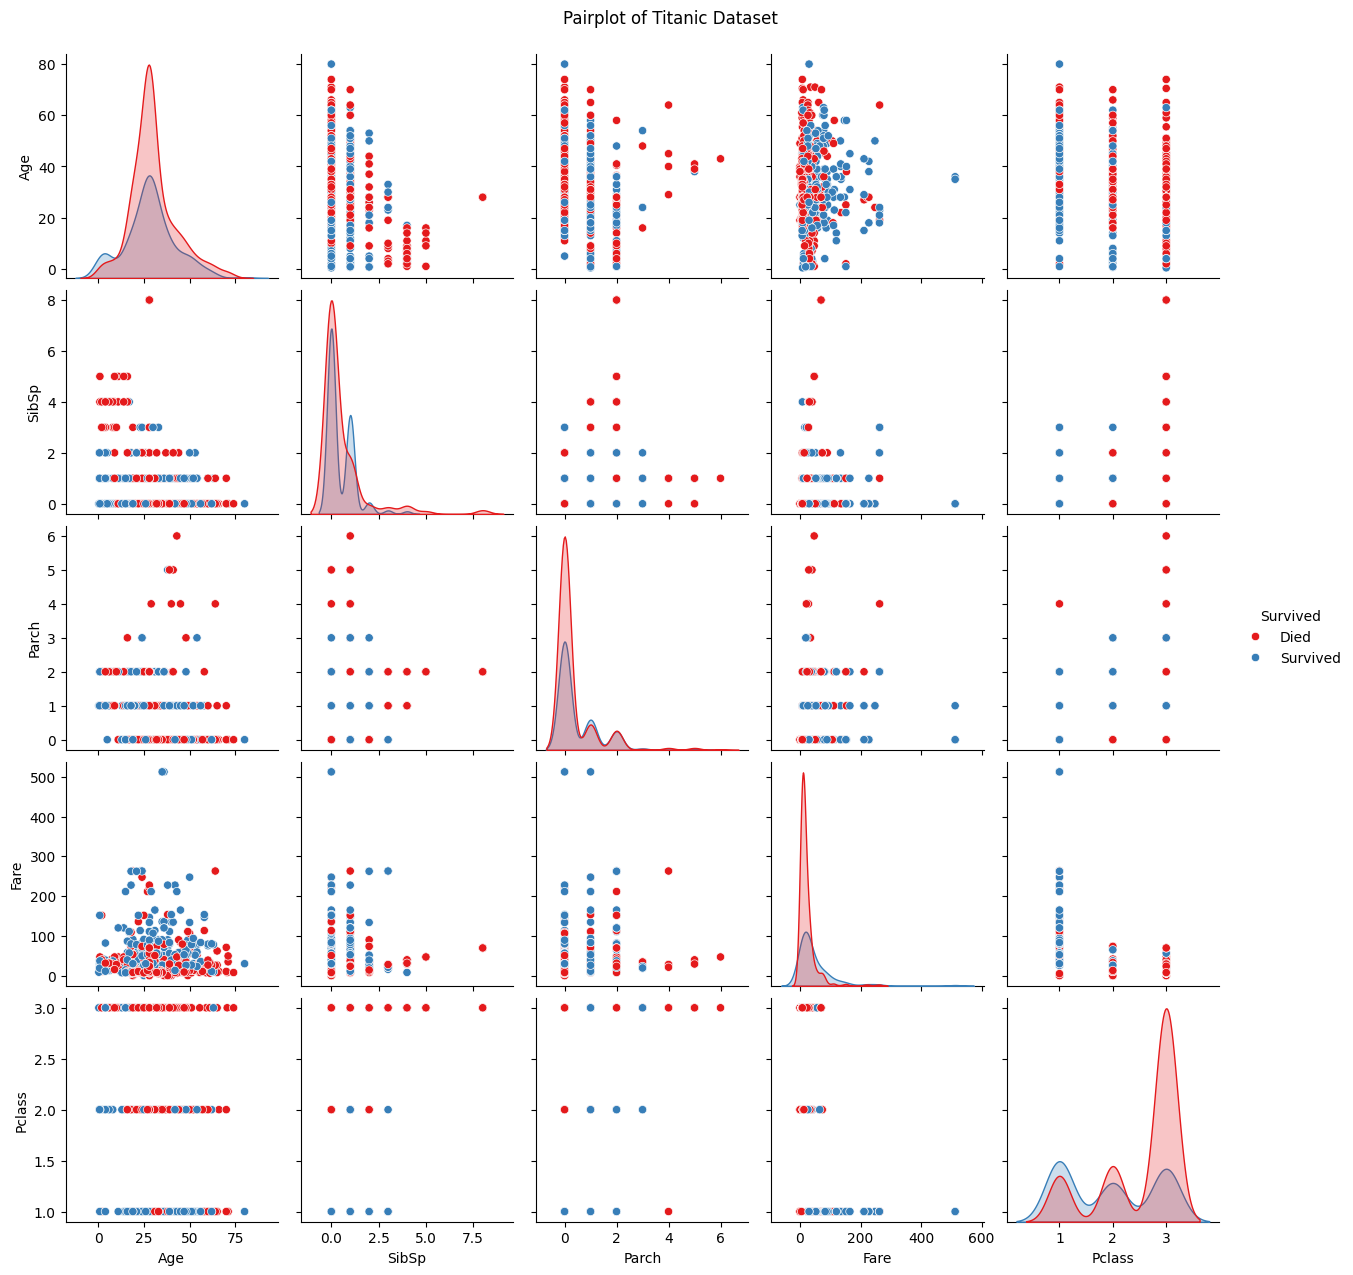

In [14]:
sns.pairplot(titanic_df, hue='Survived', diag_kind='kde', palette='Set1')
plt.suptitle('Pairplot of Titanic Dataset', y=1.02)
plt.show()

In [15]:
# Create the Passengers DataFrame
passengers_df = titanic_df[['Name', 'Sex', 'Age', 'SibSp', 'Parch']].copy()
passengers_df['PassengerID'] = range(1, len(passengers_df) + 1)
passengers_df = passengers_df[['PassengerID', 'Name', 'Sex', 'Age', 'SibSp', 'Parch']]

# Create the Tickets DataFrame
tickets_df = titanic_df[['Ticket', 'Fare']].copy()
tickets_df['PassengerID'] = passengers_df['PassengerID']
tickets_df = tickets_df[['PassengerID', 'Ticket', 'Fare']]

# Create the Classes DataFrame
classes_df = titanic_df[['Pclass']].drop_duplicates().reset_index(drop=True)
classes_df['ClassID'] = range(1, len(classes_df) + 1)

# Create the Embarkation_Ports DataFrame
ports_df = titanic_df[['Embarked']].drop_duplicates().reset_index(drop=True)
ports_df['PortID'] = range(1, len(ports_df) + 1)

# Create the Survival_Status DataFrame
survival_df = titanic_df[['Survived']].drop_duplicates().reset_index(drop=True)
survival_df['StatusID'] = range(1, len(survival_df) + 1)

# Add foreign keys to the passengers_df
passengers_df['ClassID'] = titanic_df['Pclass'].map(classes_df.set_index('Pclass')['ClassID'])
passengers_df['PortID'] = titanic_df['Embarked'].map(ports_df.set_index('Embarked')['PortID'])
passengers_df['StatusID'] = titanic_df['Survived'].map(survival_df.set_index('Survived')['StatusID'])

# Display the first 5 rows of each dataframe
print("Passengers DataFrame:")
print(passengers_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nTickets DataFrame:")
print(tickets_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nClasses DataFrame:")
print(classes_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nEmbarkation Ports DataFrame:")
print(ports_df.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nSurvival Status DataFrame:")
print(survival_df.head().to_markdown(index=False, numalign="left", stralign="left"))

Passengers DataFrame:
| PassengerID   | Name                                                | Sex    | Age   | SibSp   | Parch   | ClassID   | PortID   | StatusID   |
|:--------------|:----------------------------------------------------|:-------|:------|:--------|:--------|:----------|:---------|:-----------|
| 1             | Braund, Mr. Owen Harris                             | male   | 22    | 1       | 0       | 1         | 1        | 1          |
| 2             | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female | 38    | 1       | 0       | 2         | 2        | 2          |
| 3             | Heikkinen, Miss. Laina                              | female | 26    | 0       | 0       | 1         | 1        | 2          |
| 4             | Futrelle, Mrs. Jacques Heath (Lily May Peel)        | female | 35    | 1       | 0       | 2         | 1        | 2          |
| 5             | Allen, Mr. William Henry                            | male   | 35    | 0       | 0       |

In [16]:
# Export DataFrames to CSV files
passengers_df.to_csv('passengers.csv', index=False)
tickets_df.to_csv('tickets.csv', index=False)
classes_df.to_csv('classes.csv', index=False)
ports_df.to_csv('embarkation_ports.csv', index=False)
survival_df.to_csv('survival_status.csv', index=False)

In [17]:
# Connect to the SQLite database (this will create the database file if it doesn't exist)
conn = sqlite3.connect('titanic.db')
cursor = conn.cursor()
# delete all tables if they exist
cursor.execute("DROP TABLE IF EXISTS Passengers")
cursor.execute("DROP TABLE IF EXISTS Tickets")
cursor.execute("DROP TABLE IF EXISTS Classes")
cursor.execute("DROP TABLE IF EXISTS Embarkation_Ports")
cursor.execute("DROP TABLE IF EXISTS Survival_Status")



# Commit the changes and close the connection
conn.commit()
conn.close()


In [18]:
# Reconnect to the SQLite database
conn = sqlite3.connect('titanic.db')
cursor = conn.cursor()

# Delete all tables if they exist
cursor.execute("DROP TABLE IF EXISTS Passengers")
cursor.execute("DROP TABLE IF EXISTS Tickets")
cursor.execute("DROP TABLE IF EXISTS Classes")
cursor.execute("DROP TABLE IF EXISTS Embarkation_Ports")
cursor.execute("DROP TABLE IF EXISTS Survival_Status")



# Create the Passengers table
cursor.execute('''
CREATE TABLE Passengers (
    PassengerID INTEGER PRIMARY KEY,
    Name TEXT,
    Sex TEXT,
    Age REAL,
    SibSp INTEGER,
    Parch INTEGER,
    ClassID INTEGER,
    PortID INTEGER,
    StatusID INTEGER,
    FOREIGN KEY (ClassID) REFERENCES Classes(ClassID),
    FOREIGN KEY (PortID) REFERENCES Embarkation_Ports(PortID),
    FOREIGN KEY (StatusID) REFERENCES Survival_Status(StatusID)
)
''')

# Create the Tickets table
cursor.execute('''
CREATE TABLE Tickets (
    PassengerID INTEGER,
    Ticket TEXT,
    Fare REAL,
    FOREIGN KEY (PassengerID) REFERENCES Passengers(PassengerID)
)
''')

# Create the Classes table
cursor.execute('''
CREATE TABLE Classes (
    ClassID INTEGER PRIMARY KEY,
    Pclass TEXT
)
''')

# Create the Embarkation_Ports table
cursor.execute('''
CREATE TABLE Embarkation_Ports (
    PortID INTEGER PRIMARY KEY,
    Embarked TEXT
)
''')

# Create the Survival_Status table
cursor.execute('''
CREATE TABLE Survival_Status (
    StatusID INTEGER PRIMARY KEY,
    Survived TEXT
)
''')

# Load data from CSV files into the tables
def load_data_from_csv(csv_file, table_name):
    df = pd.read_csv(csv_file)
    df.to_sql(table_name, conn, if_exists='append', index=False)

load_data_from_csv('passengers.csv', 'Passengers')
load_data_from_csv('tickets.csv', 'Tickets')
load_data_from_csv('classes.csv', 'Classes')
load_data_from_csv('embarkation_ports.csv', 'Embarkation_Ports')
load_data_from_csv('survival_status.csv', 'Survival_Status')

In [19]:
# Commit the changes
conn.commit()

In [20]:
# Merge the DataFrames into a single DataFrame for analysis using join
query = '''
SELECT 
    Passengers.PassengerID, 
    Passengers.Name, 
    Passengers.Sex, 
    Passengers.Age, 
    Passengers.SibSp, 
    Passengers.Parch, 
    Tickets.Ticket, 
    Tickets.Fare, 
    Classes.Pclass, 
    Embarkation_Ports.Embarked, 
    Survival_Status.Survived
FROM 
    Passengers
JOIN 
    Tickets ON Passengers.PassengerID = Tickets.PassengerID
JOIN 
    Classes ON Passengers.ClassID = Classes.ClassID
JOIN 
    Embarkation_Ports ON Passengers.PortID = Embarkation_Ports.PortID
JOIN 
    Survival_Status ON Passengers.StatusID = Survival_Status.StatusID
'''

complete_df = pd.read_sql_query(query, conn)
complete_df.head()


,PassengerID,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,3,Southampton,Died
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,Cherbourg,Survived
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,3,Southampton,Survived
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,Southampton,Survived
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,3,Southampton,Died


Total number of passengers: 891
Number of survivors: 342
Number of non-survivors: 549
Survival rate: 38.38%
Non-survival rate: 61.62%


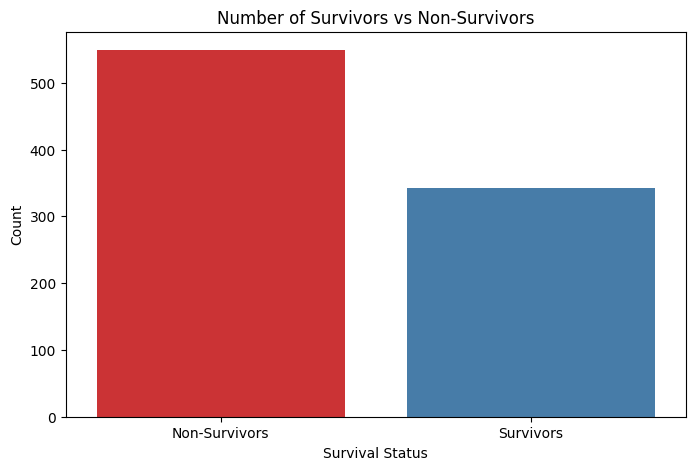

In [21]:
# Count total number of passengers
total_passengers = complete_df['PassengerID'].nunique()
print(f"Total number of passengers: {total_passengers}")
# Count number of survivors and non-survivors
survivors = complete_df[complete_df['Survived'] == 'Survived'].shape[0]
non_survivors = complete_df[complete_df['Survived'] == 'Died'].shape[0]
print(f"Number of survivors: {survivors}")
print(f"Number of non-survivors: {non_survivors}")
# Calculate the survival rate
survival_rate = (survivors / total_passengers) * 100
print(f"Survival rate: {survival_rate:.2f}%")

# Average non-survivor rate
non_survival_rate = (non_survivors / total_passengers) * 100
print(f"Non-survival rate: {non_survival_rate:.2f}%")

# Create a bar plot for the number of survivors and non-survivors
plt.figure(figsize=(8, 5))
sns.countplot(data=complete_df, x='Survived', hue='Survived', palette='Set1', dodge=False, legend=False)
plt.title('Number of Survivors vs Non-Survivors')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Survivors', 'Survivors'])
plt.show()


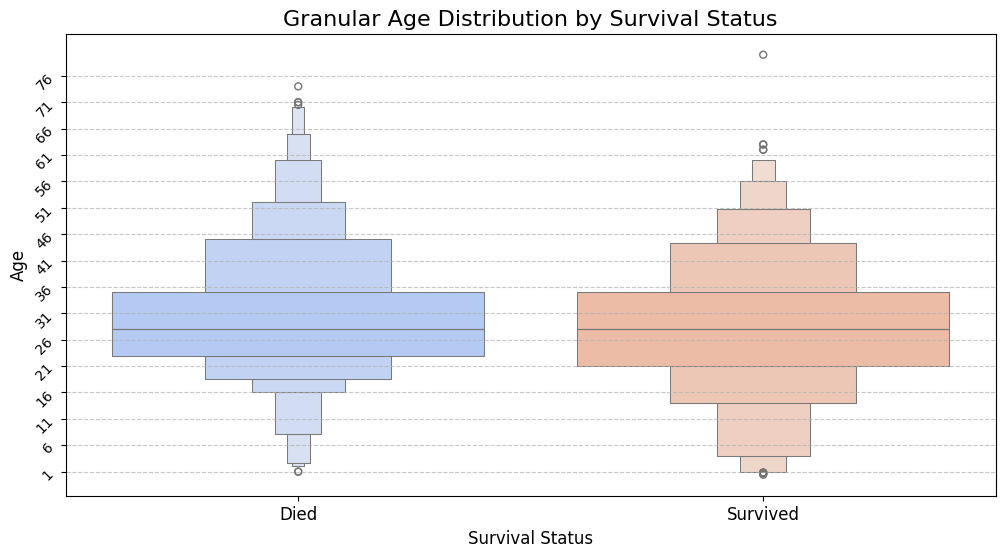

In [22]:
# Create the boxenplot
plt.figure(figsize=(12, 6))
sns.boxenplot(x='Survived', y='Age', data=titanic_df, hue='Survived', palette='coolwarm', legend=False)

# Customize the plot
plt.title('Granular Age Distribution by Survival Status', fontsize=16)
plt.xlabel('Survival Status', fontsize=12)  # Updated X label to fit the graph better
plt.ylabel('Age', fontsize=12)
plt.xticks([0, 1], ['Died', 'Survived'], fontsize=12)

# Adjust age axis labels for readability
# Show every 5 years, rotated for clarity
plt.yticks(range(1, 81, 5), fontsize=10, rotation=45)  

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()